In [1]:
from matplotlib import image as im
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import torch
from PIL import Image
import glob
import os
from torch.utils.data import Dataset, DataLoader
from from_root import from_root
import cv2

In [2]:
# Resources 
    # About Dataset,Dataloader 
    # https://medium.com/analytics-vidhya/creating-a-custom-dataset-and-dataloader-in-pytorch-76f210a1df5d
    

    

In [2]:
img = Image.open('../data/Covid19-dataset/train/Covid/02.jpeg')

In [3]:
img.size

(4248, 3480)

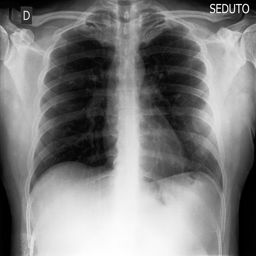

In [4]:
img.resize(size=(256,256))

In [84]:
class CustomDataset(Dataset):
    def __init__(self,folder=None):
        self.root_path = os.path.join('F:\Pytorch_Image_classification','data','Covid19-dataset',str(folder))
        self.classes = os.listdir(self.root_path)
        self.data = []
        self.label_map = {'Covid':0,'Normal':1,'Viral Pneumonia':2}
        self.img_dim = (256,256)
        for class_name in self.classes:
            class_path = os.path.join(self.root_path,class_name)
            for img in os.listdir(class_path):
                img_path = os.path.join(class_path,img)
                self.data.append([img_path, class_name])
                
    def __len__(self):
        return self.data.__len__()
    
    def __getitem__(self, idx):
        img, class_id = self.data[idx]
        # Image manipulation
        img = cv2.imread(img)
        img = cv2.resize(img,self.img_dim)
        img = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
        img = torch.from_numpy(img)
        img = img/255
        img.requires_grad = True
        img = img.reshape(256,256,1)
        img = img.permute(2, 0, 1)
        
        # label conversion
        class_id = self.label_map[class_id]
        class_id = torch.tensor(class_id)
        
        return img , class_id
        

In [85]:
dataset = CustomDataset('test')

In [86]:
test_dataset = DataLoader(dataset, batch_size=5, shuffle=True)

In [87]:
for i in test_dataset:
    d = i
    break

In [95]:
d

[tensor([[[[0.8588, 0.8549, 0.8549,  ..., 0.8549, 0.8471, 0.8510],
           [0.4667, 0.4941, 0.4980,  ..., 0.0118, 0.0078, 0.0078],
           [0.4863, 0.4745, 0.4745,  ..., 0.0078, 0.0078, 0.0078],
           ...,
           [0.0706, 0.0902, 0.0902,  ..., 0.0627, 0.0471, 0.0157],
           [0.0784, 0.0941, 0.0980,  ..., 0.0784, 0.0471, 0.0118],
           [0.0667, 0.0941, 0.0980,  ..., 0.0784, 0.0392, 0.0118]]],
 
 
         [[[0.3098, 0.0824, 0.0863,  ..., 0.0549, 0.0549, 0.0549],
           [0.1294, 0.0863, 0.0902,  ..., 0.0549, 0.0549, 0.0549],
           [0.1059, 0.0902, 0.0902,  ..., 0.0549, 0.0549, 0.0549],
           ...,
           [0.0353, 0.0353, 0.0314,  ..., 0.0549, 0.0549, 0.0549],
           [0.0353, 0.0353, 0.0314,  ..., 0.0549, 0.0549, 0.0549],
           [0.0353, 0.0353, 0.0314,  ..., 0.0549, 0.0549, 0.0549]]],
 
 
         [[[0.2157, 0.2039, 0.3608,  ..., 0.1490, 0.1373, 0.1490],
           [0.2314, 0.1961, 0.4706,  ..., 0.1529, 0.1647, 0.1294],
           [0.2000

In [96]:
d[0].shape

torch.Size([5, 1, 256, 256])

In [97]:
d[0][0].shape

torch.Size([1, 256, 256])

In [98]:
d[1].shape

torch.Size([5])

In [99]:
d[0][0].permute(1, 2, 0).shape

torch.Size([256, 256, 1])

In [100]:
import matplotlib.pyplot as plt

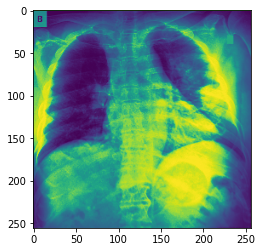

In [101]:
plt.imshow(d[0][0].permute(1, 2, 0).detach().numpy())

In [102]:
import torch.nn as nn
import torch.nn.functional as F
import torch

class NeuralNetwork(nn.Module):
    def __init__(self, in_channels=None, output=None) -> None:
        super(NeuralNetwork, self).__init__()
        # Input [1,256,256]  - >  output [64,128,128]
        self.conv_block = nn.Sequential(
            # Block 1
            nn.Conv2d(in_channels=in_channels, out_channels=64, kernel_size=(3, 3), stride=1, padding=(1, 1),
                      bias=True),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2, stride=2),
            # Block 2
            nn.Conv2d(in_channels=64, out_channels=128, kernel_size=(3, 3), stride=1, padding=(1, 1),
                      bias=True),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2, stride=2),
            # Block 3
            nn.Conv2d(in_channels=128, out_channels=32, kernel_size=(3, 3), stride=1, padding=(1, 1),
                      bias=True),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2, stride=2)
        )

        self.flatten = nn.Flatten()

        self.fully_connected_block = nn.Sequential(
            nn.Linear(in_features=32*32*32, out_features=64, bias=True),
            nn.ReLU(),
            nn.Linear(in_features=64, out_features=32, bias=True),
            nn.ReLU(),
            nn.Linear(in_features=32, out_features=output, bias=True)
        )

    def forward(self,x):
        features = self.conv_block(x)
        flatten = self.flatten(features)
        result = self.fully_connected_block(flatten)
        return result

net = NeuralNetwork(1,3)

In [103]:
net

NeuralNetwork(
  (conv_block): Sequential(
    (0): Conv2d(1, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (3): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (4): ReLU()
    (5): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (6): Conv2d(128, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (7): ReLU()
    (8): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (flatten): Flatten(start_dim=1, end_dim=-1)
  (fully_connected_block): Sequential(
    (0): Linear(in_features=32768, out_features=64, bias=True)
    (1): ReLU()
    (2): Linear(in_features=64, out_features=32, bias=True)
    (3): ReLU()
    (4): Linear(in_features=32, out_features=3, bias=True)
  )
)

In [104]:
device = "cuda" if torch.cuda.is_available() else "cpu"

In [105]:
optimizer = torch.optim.Adam(net.parameters(),lr=0.001)
cost_function = nn.CrossEntropyLoss()

In [113]:
n_epoch = 15
batch_size = 4

In [114]:
train_data_loader = DataLoader(dataset,batch_size=8)

In [115]:
for epoch in range(n_epoch):
    for images, labels in train_data_loader:
        images = images.to(device)
        labels = labels.to(device)   

        # forward pass
        outputs = net(images)
        loss = cost_function(outputs,labels)       # backward prop
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
    print(loss.item())

0.36900022625923157
0.32542848587036133
0.039077386260032654
0.03967957943677902
0.034955188632011414
0.013091989792883396
0.046311452984809875
0.0026686526834964752
0.005222952924668789
0.011432040482759476
0.004060984589159489
0.0022420475725084543
0.0021152987610548735
0.002255756873637438
0.0021077319979667664


In [26]:
l = [ 0.0278, -0.0740,  0.1664]

In [27]:
sum(l)

0.1202

In [116]:
import os

In [120]:
os.curdir

'.'